Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

Reading the dataset

In [ ]:
df = pd.read_csv('vehicle_maintenance_data.csv')
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [ ]:
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


In [ ]:
df_truck = df[df['Vehicle_Model']=='Truck']

In [ ]:
df_truck

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
5,Truck,31653,Average,2,1,Diesel,Automatic,800,70954,2023-08-12,2024-09-05,Third,16813,5,3,15.954422,Worn Out,Good,New,0
33,Truck,37777,Poor,4,5,Electric,Automatic,800,127740,2023-08-19,2024-05-22,Second,8425,8,3,17.213328,Worn Out,New,Good,1
35,Truck,55518,Poor,4,8,Diesel,Automatic,2000,19685,2023-12-31,2024-11-19,First,16488,2,3,16.367697,New,Worn Out,Weak,1
36,Truck,48586,Average,2,10,Diesel,Manual,800,37758,2023-08-31,2025-09-29,Third,22244,10,2,16.369858,Good,Good,New,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,Truck,73488,Average,5,10,Petrol,Automatic,2500,92402,2023-06-02,2025-09-27,Second,25464,2,0,13.974331,New,New,Weak,1
49980,Truck,54205,Good,3,4,Electric,Manual,2500,34461,2023-08-21,2024-12-04,First,26590,5,3,15.778299,Worn Out,Worn Out,Good,1
49989,Truck,52336,Poor,2,10,Electric,Manual,1500,103989,2023-10-24,2025-12-19,Second,21737,4,2,15.802016,Worn Out,Good,New,1
49994,Truck,31999,Good,0,10,Petrol,Automatic,2000,40748,2023-07-23,2026-02-22,Third,27947,4,0,10.894066,Worn Out,Worn Out,Good,1


Dropping Not useful columns

In [ ]:
columns_to_drop = ["Vehicle_Model", "Warranty_Expiry_Date", "Insurance_Premium"]
for col in columns_to_drop:
    df_truck = df_truck.drop(col, axis = 1)

In [ ]:
df_truck.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Owner_Type,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,Second,6,3,13.622204,New,New,Weak,1
5,31653,Average,2,1,Diesel,Automatic,800,70954,2023-08-12,Third,5,3,15.954422,Worn Out,Good,New,0
33,37777,Poor,4,5,Electric,Automatic,800,127740,2023-08-19,Second,8,3,17.213328,Worn Out,New,Good,1
35,55518,Poor,4,8,Diesel,Automatic,2000,19685,2023-12-31,First,2,3,16.367697,New,Worn Out,Weak,1
36,48586,Average,2,10,Diesel,Manual,800,37758,2023-08-31,Third,10,2,16.369858,Good,Good,New,1


In [ ]:
df_truck['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])

Checking Missing Values

In [ ]:
df_truck.isnull().sum()

Mileage                0
Maintenance_History    0
Reported_Issues        0
Vehicle_Age            0
Fuel_Type              0
Transmission_Type      0
Engine_Size            0
Odometer_Reading       0
Last_Service_Date      0
Owner_Type             0
Service_History        0
Accident_History       0
Fuel_Efficiency        0
Tire_Condition         0
Brake_Condition        0
Battery_Status         0
Need_Maintenance       0
dtype: int64

In [ ]:
columns_to_encode = ["Maintenance_History", "Fuel_Type", "Transmission_Type", "Owner_Type", "Tire_Condition", "Brake_Condition", "Battery_Status"]

In [ ]:
label = LabelEncoder()
df_test = df_truck
df_test.shape

(8328, 17)

Converting Categorical to Numerical

In [ ]:
df_test['Maintenance_History'] = label.fit_transform(df_test['Maintenance_History'])
df_test['Fuel_Type'] = label.fit_transform(df_test['Fuel_Type'])
df_test['Transmission_Type'] = label.fit_transform(df_test['Transmission_Type'])
df_test['Owner_Type'] = label.fit_transform(df_test['Owner_Type'])
df_test['Tire_Condition'] = label.fit_transform(df_test['Tire_Condition'])
df_test['Brake_Condition'] = label.fit_transform(df_test['Brake_Condition'])
df_test['Battery_Status'] = label.fit_transform(df_test['Battery_Status'])

In [ ]:
df_test['current_date'] = '2024-05-08'

In [ ]:
df['current_date'] = pd.to_datetime(df_test['current_date'])

Feature Engineering

-Created a new column Days since last serviced

In [ ]:
df_test[['Last_Service_Date','current_date']] = df[['Last_Service_Date','current_date']].apply(pd.to_datetime)
df_test['Days_since_last_service'] = (df_test['current_date'] - df_test['Last_Service_Date']).dt.days

In [ ]:
new_drop = ["Last_Service_Date", "current_date"]
for col in new_drop:
    df_test= df_test.drop(col, axis=1)

In [ ]:
df_test.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Owner_Type,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance,Days_since_last_service
0,58765,1,0,4,1,0,2000,28524,1,6,3,13.622204,1,1,2,1,167
5,31653,0,2,1,0,0,800,70954,2,5,3,15.954422,2,0,1,0,270
33,37777,2,4,5,1,0,800,127740,1,8,3,17.213328,2,1,0,1,263
35,55518,2,4,8,0,0,2000,19685,0,2,3,16.367697,1,2,2,1,129
36,48586,0,2,10,0,1,800,37758,2,10,2,16.369858,0,0,1,1,251


In [ ]:
Y = df_test['Need_Maintenance']
X = df_test.drop('Need_Maintenance', axis=1)

Normalization

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Score reports for Logistics Regression

In [ ]:
print("ACCURACY:", accuracy_score(y_pred, y_test))
print("\n\n")
print(confusion_matrix(y_pred, y_test))
print("\n\n")
print(classification_report(y_pred, y_test))

ACCURACY: 0.8871548619447779



[[ 190   55]
 [ 133 1288]]



              precision    recall  f1-score   support

           0       0.59      0.78      0.67       245
           1       0.96      0.91      0.93      1421

    accuracy                           0.89      1666
   macro avg       0.77      0.84      0.80      1666
weighted avg       0.90      0.89      0.89      1666



Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_2 = logreg.predict(X_test)

Score reports for Random Forest


In [ ]:
print("ACCURACY:", accuracy_score(y_pred_2, y_test))
print("\n\n")
print(confusion_matrix(y_pred_2, y_test))
print("\n\n")
print(classification_report(y_pred_2, y_test))

ACCURACY: 0.8871548619447779



[[ 190   55]
 [ 133 1288]]



              precision    recall  f1-score   support

           0       0.59      0.78      0.67       245
           1       0.96      0.91      0.93      1421

    accuracy                           0.89      1666
   macro avg       0.77      0.84      0.80      1666
weighted avg       0.90      0.89      0.89      1666



Cross-Validation

In [ ]:
from sklearn.metrics import f1_score
y_pred_3 = cross_val_predict(rf, X_test, y_test, cv=10)

print(accuracy_score(y_pred_3,y_test))
print(f1_score(y_pred_3, y_test))

0.9867947178871549
0.9918759231905465


Plotting Feature Importance

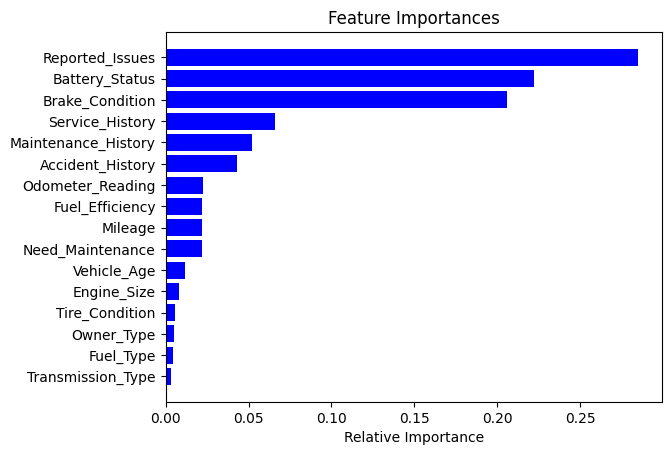

In [ ]:
features = df_test.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print(y_test)
print(y_pred)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


Local Deployment

In [ ]:
from flask import Flask, request, render_template, jsonify

In [ ]:
application = Flask(__name__)
app = application

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def maintenance():
        features = [request.form.get(f, type=float) for f in [
            'mileage', 'maintenanceHistory', 'reportedIssues', 'vehicleAge', 'fuelType',
            'transmissionType', 'engineSize', 'odometerReading', 'ownerType', 'serviceHistory',
            'accidentHistory', 'fuelEfficiency', 'tireCondition', 'brakeCondition',
            'batteryStatus', 'daysSinceLastService'
        ]]
        feature_array = np.array(features).reshape(1, -1)
        feature_array = label.transform(feauture_array)
        feature_array = scaler.transform(feature_array)
        prediction = rf.predict([feature_array])[0]
        return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [08/May/2024 15:30:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/May/2024 15:32:11] "POST /predict HTTP/1.1" 400 -
